# Segmentation of households according to their electrical consumption

## Reminder of the subject: 

As electricity cannot be stored on a large scale, the balance between production and consumption must be permanently maintained in order to ensure the security of the system and the network and to avoid black-outs. In fact, forecasting electricity consumption is a major challenge. Individual consumption is very difficult to forecast (because it is very erratic), but once aggregates of fifty or more households are considered, consumption becomes smoother and more predictable. Consumers' behaviors are very variable and grouping them into different homogeneous groups can be useful to allow a better understanding of their consumption and to propose more adapted offers or to forecast the consumption of each homogeneous group and thus better understand the global consumption by aggregating these forecasts (bottom-up forecast). The objective of this topic is to segment the different households into the most homogeneous groups possible.

# I - Import and descriptive analysis of the data

## A- Import

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import calendar
from sklearn import preprocessing
import time

In [1]:
df = pd.read_csv('data_train.csv')

NameError: name 'pd' is not defined

We notice that there are 14,591 rows, which correspond to the $tracking$ of the electricity consumption of a household, performed every 30 minutes. Each column corresponds to one of the 1006 households.

In order to complete these data, we import temperature and cloudiness data from another data-set, so that we can study characteristics such as the thermosensitivity of households.

In [3]:
df_temp = pd.read_csv("data_train_température.csv")[["date_time","nebulosity", "temperature"]]

df_temp = pd.merge(df_temp,df,how="inner",left_on="date_time", right_on = "GMT")
df_temp = df_temp.drop(columns = "date_time")

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_temp[["nebulosity"]] = scaler.fit_transform(df_temp[["nebulosity"]])
df_temp[["temperature"]] = scaler.fit_transform(df_temp[["temperature"]])


time = df["GMT"]

,nebulosity,temperature,GMT,D0000,D0001,D0002,D0003,D0004,D0005,D0006,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
0,0.788608,0.298883,2013-01-01 00:00:00,1.043,0.181,0.224,0.077,0.195,0.040,0.146,...,0.016,0.028,0.266,0.063,0.182,0.305,0.074,0.177,0.066,0.059
1,0.787342,0.297486,2013-01-01 00:30:00,0.404,0.248,0.227,0.078,0.202,0.066,0.161,...,0.032,0.005,0.236,0.054,0.196,0.838,0.081,0.166,0.110,0.058
2,0.784810,0.296089,2013-01-01 01:00:00,0.185,0.206,0.231,0.076,0.188,0.057,0.227,...,0.046,0.005,0.289,0.060,0.218,0.446,0.039,0.145,0.100,0.087
3,0.788608,0.295531,2013-01-01 01:30:00,0.151,0.171,0.236,0.077,0.039,0.052,0.138,...,0.016,0.005,0.239,0.057,0.181,0.410,0.059,0.133,0.234,0.040
4,0.793671,0.295251,2013-01-01 02:00:00,0.139,0.068,0.239,0.077,0.024,0.070,0.040,...,0.016,0.005,0.120,0.263,0.174,0.282,0.049,0.049,0.056,0.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14587,0.483544,0.233240,2013-11-30 21:30:00,0.378,0.091,0.216,0.093,0.199,0.523,0.806,...,0.070,0.024,1.005,0.054,0.191,0.597,0.227,0.175,0.045,0.087
14588,0.481013,0.229050,2013-11-30 22:00:00,0.226,0.090,0.226,0.094,0.199,0.251,0.923,...,0.052,0.149,0.489,0.056,0.299,0.299,0.252,0.175,0.036,0.403
14589,0.459494,0.224860,2013-11-30 22:30:00,0.210,0.070,0.236,0.094,0.188,0.237,0.499,...,0.055,0.037,0.158,0.049,0.305,0.229,0.235,0.168,0.058,0.216
14590,0.439241,0.220670,2013-11-30 23:00:00,0.219,0.117,0.222,0.090,0.144,0.184,0.375,...,0.018,0.040,0.168,0.061,0.271,0.292,0.199,0.178,0.066,0.189


## B- Descriptive statistics

 We only want to make a rough visualization for the moment in order to better understand our data, so we will aggregate the consumption by **month** and by **week**. The advantage of the monthly visualization lies in the fact that it allows us to observe the most heat-sensitive households, i.e. those whose energy consumption is most affected by variations in outside temperatures.

In [4]:
df_month = df_temp.copy()# création d'un dataframe retraçant la consommation mensuelle
df_month['Month'] = df_month['GMT'].str[5:7] ## 7 permet de ne garder que ce qui correspond au mois dans la série de caractères.
df_month['Month'] = df_month['Month'].transform(int, axis = 0) # permet que le mois soit un entier plutôt qu'une chaîne de caractères.
df_month = df_month.groupby('Month').sum()
df_month_june = df_month[0:5].append(pd.Series(), ignore_index=True).append(df_month[5:11])
df_month_june.set_index(pd.Index(calendar.month_name[1:12]), inplace = True)
#On rajoute une ligne de NaN pour le mois de juin 


<ipython-input-4-8898e971127a>:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  df_month_june = df_month[0:5].append(pd.Series(), ignore_index=True).append(df_month[5:11])


In [5]:
df_day = df_temp.copy()
df_day["Day"] = df_day['GMT'].str[5:10]
df_day =  df_day.groupby(["Day"]).sum()
df_day = df_day.reset_index(drop = False)

,Day,nebulosity,temperature,D0000,D0001,D0002,D0003,D0004,D0005,D0006,...,D1015,D1016,D1017,D1018,D1019,D1020,D1021,D1022,D1023,D1024
0,01-01,31.227848,14.101955,10.144,7.624,12.686,9.511,8.795,5.584,11.329,...,1.242,1.792,11.160,9.028,8.031,13.555,5.816,13.455,2.613,4.345
1,01-02,17.822785,11.916201,6.058,8.057,12.817,9.137,7.536,8.000,16.559,...,2.994,1.639,10.844,7.280,5.627,6.333,3.564,8.157,3.353,7.505
2,01-03,20.398734,13.987430,4.841,5.978,11.903,8.981,9.034,8.668,21.294,...,3.232,1.799,9.224,2.234,5.541,7.708,2.744,6.065,2.503,7.353
3,01-04,28.158228,15.266760,6.965,7.635,11.406,8.884,8.595,6.768,18.090,...,4.845,1.854,9.249,2.203,4.562,9.106,6.489,6.655,3.069,4.243
4,01-05,29.272152,14.469274,3.324,7.098,11.202,10.465,7.535,7.911,13.915,...,2.281,1.791,9.661,2.160,6.695,9.709,8.031,8.236,2.030,6.239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,11-26,24.493671,10.368715,7.830,4.776,26.902,7.636,6.043,8.160,13.926,...,3.145,1.464,7.809,5.717,9.485,13.153,2.515,9.354,2.888,3.206
300,11-27,19.677215,8.805866,6.044,4.960,31.207,8.288,6.661,8.500,13.052,...,3.327,1.436,9.398,4.382,7.911,8.454,2.531,6.772,1.634,4.981
301,11-28,19.322785,7.533520,7.195,4.462,18.571,7.934,6.250,6.485,10.023,...,3.117,1.513,11.820,3.695,8.291,11.568,2.650,5.866,1.704,5.025
302,11-29,30.025316,11.296089,9.530,4.327,17.701,6.901,6.619,7.881,12.744,...,3.574,1.769,8.777,3.707,7.048,8.940,3.178,5.684,2.622,5.753


Now everything is in place to be able to graphically represent consumption curves. (We could eventually create a new line **June** that would average the consumption of May and July, but it doesn't seem necessary here).

Below we implement a **graph_consos** function that allows us to display the profiles we want, aggregating **by the average individual data at monthly or weekly level**. 

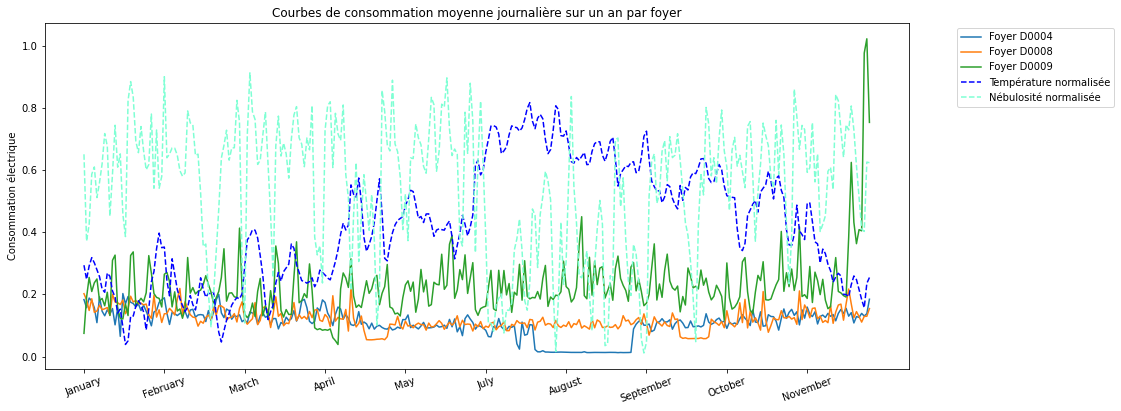

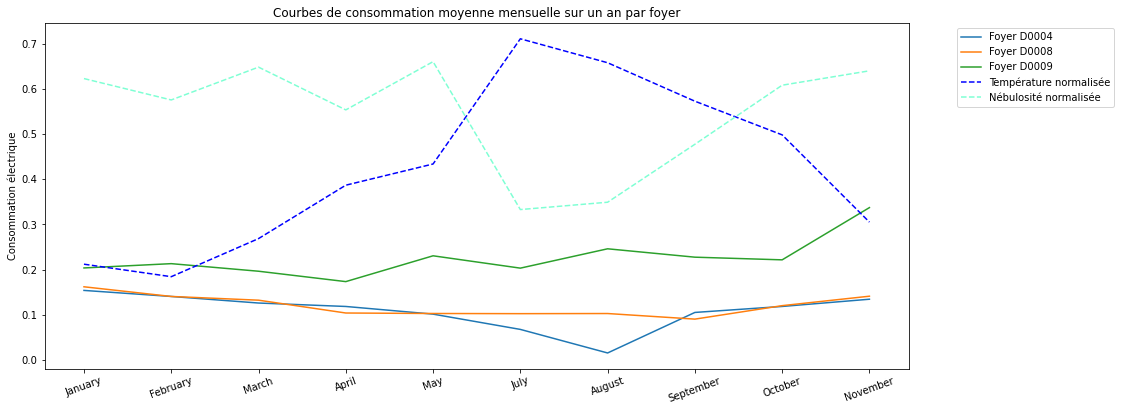

In [6]:
def graph_consos(DataFrame, time , liste_profils):
    x = DataFrame.copy()
    temp = df_temp.copy()
    #On utilise la fonction copy pour ne pas modifier le DataFrame considéré
    if time == 'Month':
        k = 7 #mois
        s = 1
        mode = 'mensuelle'
    else:
        k = 10 #jours
        s = 31
        mode = 'journalière'
    
    temp[time] = temp["GMT"].str[5:k]
    temp = temp.groupby(time).mean()
    x[time] = x['GMT'].str[5:k]
    x = x.groupby(time).mean()
    
    fig = plt.figure(figsize = [12, 4.8])
    a1 = fig.add_axes([0,0,1,1]) 
    a1.set_ylabel('Consommation électrique')
    plt.xticks(np.arange(len(x), step = s), calendar.month_name[1:6]+calendar.month_name[7:12], rotation=20)  
    plt.title('Courbes de consommation moyenne %s sur un an par foyer' % mode)
    
    for profil in liste_profils:
        plt.plot(x[profil], label= 'Foyer %s' % profil) #boucle if qui permet de toujours avoir une belle légende
    
    plt.plot(temp[["temperature"]], "--", color = 'blue', label = "Température normalisée")
    plt.plot(temp[["nebulosity"]],"--", color = "aquamarine", label = "Nébulosité normalisée")
    plt.legend(bbox_to_anchor=(1.05, 1))
    plt.show()

graph_consos(DataFrame = df, time='Week', liste_profils = ["D0004", "D0008", "D0009"])
graph_consos(df, time = 'Month', liste_profils = ["D0004", "D0008","D0009"])
  

Aggregating the data to a monthly scale seems to squash the variability of the data considerably, but it does provide insight into the consumption patterns of different households, and is a first technique for aggregating data. 
In order to be able to analyze finer and more subtle behaviors, we can also look at curves like the average weekly consumption of some households. 
The function below allows us to represent the consumption week of our choice for a household. 
The second function, which uses the first one, allows us to obtain the average week of a household for the year 2013. It thus makes it possible to detect if the household consumes more during the week or during the weekend.

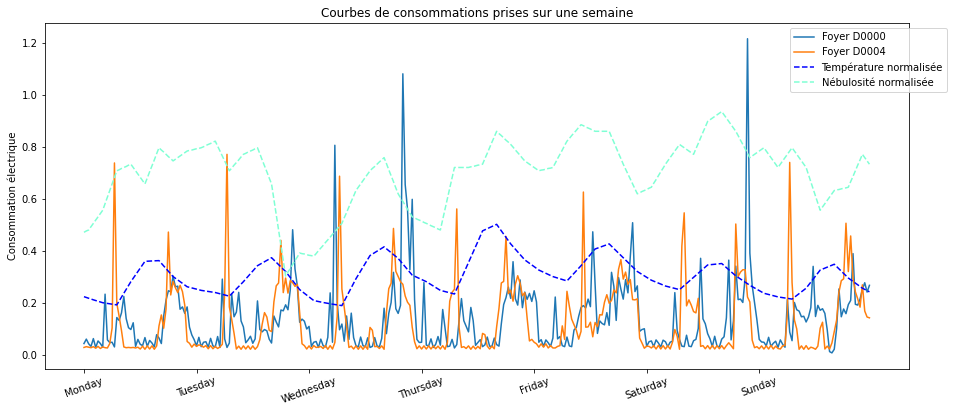

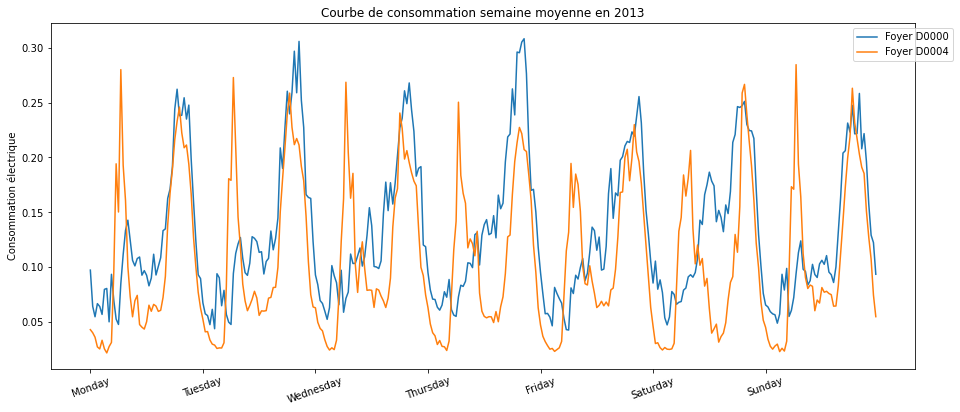

In [7]:
def graph_conso_semaine(DataFrame, liste_profils , semaine , plot): 
    
    x = DataFrame.copy()
    temp = df_temp.copy()
    x = x.drop(columns = 'GMT')
    temp = temp.drop(columns = 'GMT')
    
    n = x.shape[0]
    
    if semaine > n/(7*48):
        return('Semaine trop grande')
    else : 
        init = (semaine-1)*7*48 #7 jours dans la semaine et 48 fois une demi-heure par jour
        end = (init+7*48)
        data = x.iloc[init:end]
        temperature = temp.iloc[init:end]
        
    if plot == True : 
        fig = plt.figure(figsize = [12, 4.8])
        a1 = fig.add_axes([0,0,1,1]) 
        a1.set_ylabel('Consommation électrique')  
        plt.title('Courbes de consommations prises sur une semaine')
        plt.xticks(np.arange(init, end, step = 48), calendar.day_name[0:8], rotation=20)
        for profil in liste_profils:
            plt.plot(data[profil], label= 'Foyer %s' % profil) 
        plt.plot(temperature[["temperature"]], "--", color = 'blue', label = "Température normalisée")
        plt.plot(temperature[["nebulosity"]],"--", color = "aquamarine", label = "Nébulosité normalisée")
        plt.legend(bbox_to_anchor=(1.05, 1))
        return(plt.show())
    else : 
        return(pd.DataFrame(data[profil] for profil in liste_profils).transpose().reset_index(drop = True))
    

def semaine_moyenne(DataFrame, profil):
    
    d1 = graph_conso_semaine(DataFrame, liste_profils = [profil], semaine = 1, plot = 'FALSE')
    for i in range(2,44):
        d2 = graph_conso_semaine(DataFrame, liste_profils = [profil], semaine = i, plot = 'FALSE')
        d1 = pd.concat([d1, d2], axis=1)
    d1 = d1.apply(np.mean, 1)
    return(pd.DataFrame(d1))
    

def semaine_moyenne_liste(DataFrame, liste_profils, plot):
    if plot == True: 
        fig = plt.figure(figsize = [12, 4.8])
        a1 = fig.add_axes([0,0,1,1]) 
        a1.set_ylabel('Consommation électrique')  
        plt.title('Courbe de consommation semaine moyenne en 2013')
        plt.xticks(np.arange(0, 7*48, step = 48), calendar.day_name[0:8], rotation=20)
        for profil in liste_profils:
            plt.plot(semaine_moyenne(DataFrame, profil), label= 'Foyer %s' % profil) 
        plt.legend(bbox_to_anchor=(1.05, 1))
        return(plt.show())
        
    else : 
        d1 = semaine_moyenne(DataFrame, liste_profils[0])
        for profil in liste_profils[1:]:
            d2 = semaine_moyenne(profil)
            d1 = pd.concat([d1, d2], axis = 1)
        return(d1)

graph_conso_semaine(df, ["D0000", "D0004"] , 12 , plot= True)
semaine_moyenne_liste(df, ["D0000", "D0004"], plot = True)


The previous graphical functions allow us to better understand the behavior of the different profiles. On the first graph, the one that shows consumption over a given week, the peaks are relatively high, we notice in particular that the consumption of D0004 varies a lot. The second graph allows us to have an even finer vision of the behaviors: it seems in particular that the household 0004 always knows a peak of consumption in the morning, while that of D0000 increases gradually until the evening, with an intermediate peak at midday. The graphs seem to suggest here that D0000 eats at home at noon and uses household appliances, while D0004 only returns home in the evening, although he consumes much more in the morning (perhaps he turns on the television, for example).
The previous graphical functions will be very useful to visualize the differences between the different groups obtained by our clustering. We implement a last one that allows to visualize the average consumption per day.

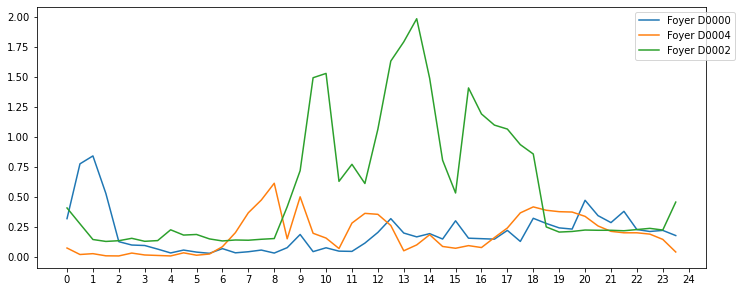

In [8]:
import datetime
import matplotlib.dates as mdates

liste_des_jours = pd.unique(df['GMT'].str[5:10])

def valeurs_journee(df, profil, journee):
    df_day = df[df["GMT"].str[5:10] == journee][profil]
    d1 = pd.DataFrame(df_day).reset_index(drop = True)
    return(d1)

def journee_moyenne(df, profil):
    d1 = valeurs_journee(df, profil, liste_des_jours[0])
    for jour in liste_des_jours[1:]:
        d2 = valeurs_journee(df, profil, jour)
        d1 = pd.concat([d1, d2], axis=1)
    d1 = d1.apply(np.mean, 1)
    return(pd.DataFrame(d2))

def journee_moyenne_liste(df, liste_profils, plot):
    if plot == True: 
        fig = plt.figure(figsize = [12, 4.8])
        for profil in liste_profils:
            plt.plot(journee_moyenne(df, profil), label= 'Foyer %s' % profil)
        plt.legend(bbox_to_anchor=(1.05, 1))
        plt.xticks(np.arange(0,50, step=2), np.arange(25))
        return(plt.show())
        
    else : 
        d1 = journee_moyenne(df, liste_profils[0])
        for profil in liste_profils[1:]:
            d2 = journee_moyenne(profil)
            d1 = pd.concat([d1, d2], axis = 1)
        return(d1)

journee_moyenne_liste(df, ["D0000", "D0004", "D0002"], plot = True)

The above example shows one of the first limitations of our data: raw consumption can vary greatly between individuals. Households D0001 and D0004 are here slightly overwhelmed by the consumption of household 0002, and the differences in behavior between the two lowest consuming households are much less obvious visually speaking. Our clustering algorithm will surely also identify the fact that the consumption of D0002 is much higher than the others, and thus make a group with D002 and another with the low-consuming households. In order to focus on the **behavioral differences**, it could be interesting to normalize each curve so that the raw consumption differences are not identified by the clustering algorithm.

#### Normalization

As we have just said, we are probably more interested in explaining fine differences in behavior between consumers than in "raw" differences in consumption. We are much more interested in the shape of their time series than in the average of their values, and therefore normalization on the different profiles seemed to us to be a good idea (all individuals have an average consumption over the year equal to 0, with a variance of 1). 

In [9]:
df_to_scale = df.set_index('GMT')

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled = scaler.fit_transform(df_to_scale)

df_scaled = pd.DataFrame(df_scaled)

df_scaled.describe()

,0,1,2,3,4,5,6,7,8,9,...,997,998,999,1000,1001,1002,1003,1004,1005,1006
count,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,...,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04,1.459200e+04
mean,-4.972341e-16,7.417160e-16,8.025569e-17,5.044736e-16,-3.005789e-16,1.278978e-16,-1.833063e-17,-1.116639e-15,-1.693334e-16,-4.480989e-16,...,9.933765e-17,1.274162e-15,-4.046014e-16,-2.309237e-16,-2.026606e-15,1.137157e-16,-1.572055e-16,5.903576e-16,5.211003e-15,8.732811e-16
std,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,...,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00,1.000034e+00
min,-9.412490e-01,-1.252229e+00,-7.859210e-01,-6.149294e-01,-8.453349e-01,-1.919254e+00,-9.047149e-01,-9.417749e-01,-8.717916e-01,-7.976964e-01,...,-8.932445e-01,-4.477546e-01,-1.081702e+00,-6.003160e-01,-1.033533e+00,-9.879433e-01,-7.345236e-01,-7.487708e-01,-6.232818e-01,-8.839298e-01
25%,-6.528619e-01,-6.392304e-01,-6.621783e-01,-3.687949e-01,-6.960576e-01,-7.950067e-01,-6.946587e-01,-3.428868e-01,-6.300169e-01,-4.338857e-01,...,-5.006689e-01,-3.489551e-01,-6.068725e-01,-3.600738e-01,-8.278539e-01,-5.888967e-01,-4.743339e-01,-5.982302e-01,-5.350155e-01,-5.324115e-01
50%,-3.644748e-01,-2.258125e-01,-4.559405e-01,-3.464190e-01,-4.970212e-01,-4.550820e-02,-3.413825e-01,-1.410875e-01,-3.672182e-01,-2.615544e-01,...,-2.482989e-01,-2.913220e-01,-2.950445e-01,-2.177080e-01,-2.978357e-01,-3.228656e-01,-2.732781e-01,-3.329922e-01,-2.113725e-01,-2.899851e-01
75%,3.413147e-01,4.584656e-01,3.107789e-01,-2.313431e-01,4.235221e-01,6.345923e-01,3.269780e-01,8.675032e-02,3.265702e-01,2.687035e-03,...,2.284000e-01,-1.595892e-01,2.435676e-01,-1.198315e-01,5.169684e-01,2.281988e-01,2.239207e-02,2.548327e-01,2.005368e-01,1.342612e-01
max,1.006300e+01,1.092222e+01,8.654918e+00,4.755278e+00,6.046300e+00,1.094714e+01,6.714595e+00,2.193315e+01,1.262555e+01,1.629757e+01,...,1.818873e+01,1.390288e+01,8.825925e+00,1.907286e+01,1.047656e+01,8.171127e+00,1.232227e+01,1.400420e+01,1.354346e+01,1.400105e+01


Représentons les données normalisées graphiquement :

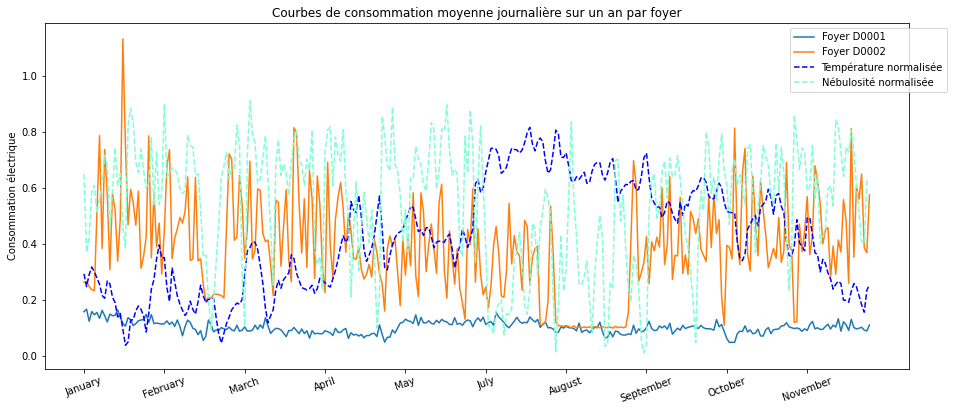

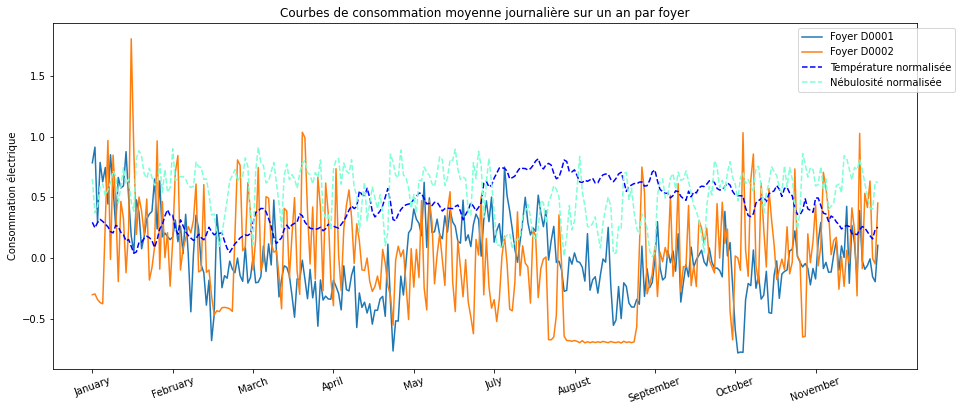

In [10]:
df_scaled_graph = df_scaled.copy()

df_scaled_graph.columns = df.columns[1:]

df_scaled_graph['GMT'] = df['GMT']


graph_consos(df, time='Week', liste_profils = ["D0001", "D0002"])
graph_consos(df_scaled_graph, time='Week',liste_profils = ["D0001", "D0002"])


We see that the D001 household has a much more explicit curve than before: where without standardization, this one stood out mainly by a low consumption, we now notice that it tends to consume more from May to August: perhaps a person living in the South needing air conditioning at home...

However, what is classically done in time series is not normalization but rather seasonal adjustment. Indeed, time series often have seasonality, or a trend, and the classical way to make their mean equal to 0 is to use seasonality observation methods. So perhaps seasonalizing the data might make more sense than normalizing it.

In [11]:
df_deseason_week =  df.drop(columns = ["GMT"])[48*7:].reset_index().drop(columns = ["index"]) - df.drop(columns = ["GMT"])[:-48*7] 
time_week = time[48*7:].reset_index()
df_deseason_week = pd.merge(time_week, df_deseason_week, left_index = True, right_index = True)

time_day = df_deseason_week['GMT'][7*48:].reset_index()
time_day
df_deseason_day =  df_deseason_week.drop(columns = ["GMT"])[48*7:].reset_index().drop(columns = ["index"]) - df_deseason_week.drop(columns = ["GMT"])[:-48*7] 
df_d = pd.merge(time_day, df_deseason_day, left_index = True, right_index = True)

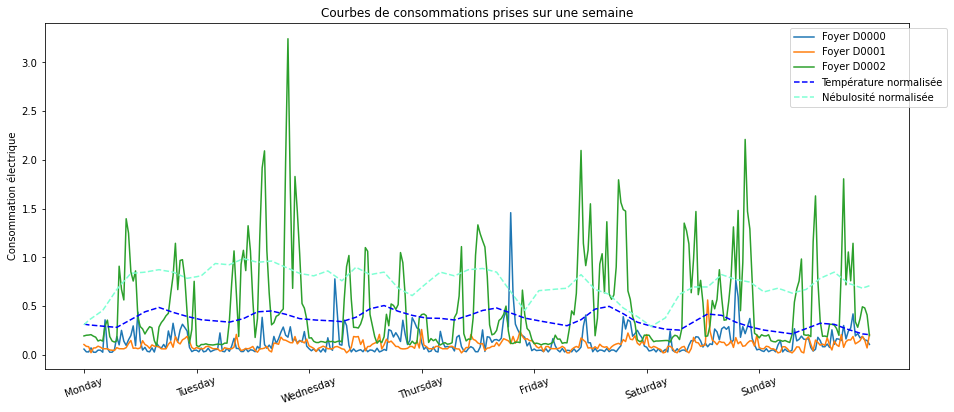

Sans desaison


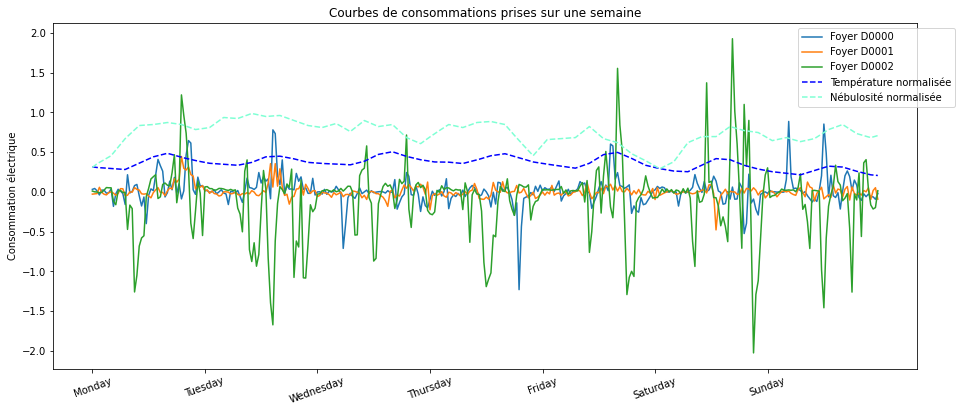

Desaison sur les semaines


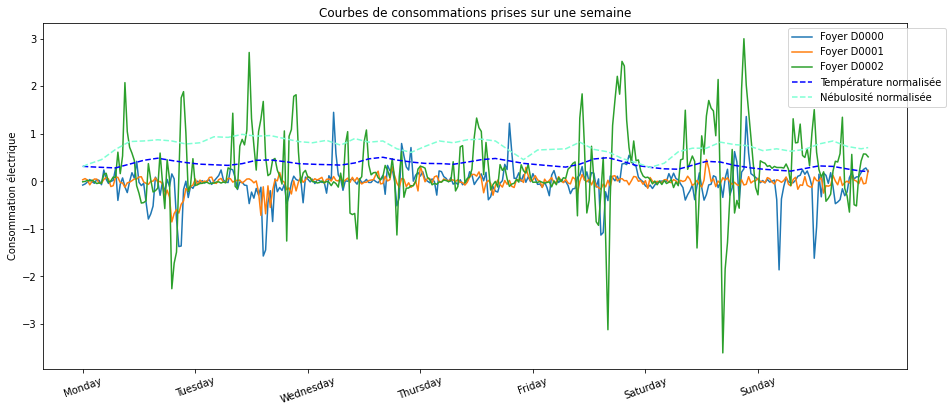

Desaison sur les jours et les semaines


In [12]:
graph_conso_semaine(df, liste_profils = ['D0000', "D0001", "D0002"], semaine = 10, plot = True)
print('Sans desaison')
graph_conso_semaine(df_deseason_week, liste_profils = ['D0000', "D0001", "D0002"], semaine = 10, plot = True)
print('Desaison sur les semaines')
graph_conso_semaine(df_d, liste_profils = ['D0000', "D0001", "D0002"], semaine = 10, plot = True)
print('Desaison sur les jours et les semaines')

**df_d** is the dataframe obtained after removing seasonality at the day and week scale. Since we are working on time series that represent energy consumption per household, we assume that there is no seasonality at the month scale, because winter months cause a much higher energy consumption than summer months. 

It can be seen on these graphs that deseasonalization flattens the curves a little. Indeed, by removing seasonality, we remove some of the information specific to behavior: habits. Thus, although this technique is efficient to model time series for prediction purposes, removing seasonality did not seem to be relevant for clustering purposes. We lose interesting data on behaviors when our goal is to differentiate them as much as possible. We will therefore continue with series containing seasonality.

## II - Reduction de dimension##

First of all, in order to be able to establish consumption profiles, it is important to reduce our number of features and to aggregate our data, in order to see more clearly. Aggregating the consumption by month was a way to reduce the dimensionality, in a very rough and arbitrary way, but it shows that in order to succeed in the clustering problem and to avoid the algorithms to run too long, it is necessary to represent the consumption time series by indicators, less numerous, but with the least variance possible. It is necessary to extract from this series what characterizes it the most, in order to obtain a really efficient clustering. We have identified 3 possible ways to reduce the dimension of our data:
- First, apply a *ACP* on the data, in order to mathematically optimize the loss of variance, but without having any interpretable features
- Recreate our own features, inspired by time series analysis techniques. This allows us this time to have very easily interpretable features, but not necessarily optimized for clustering
- The *Non-Negative Matric Factorization*, which allows to reduce positive data, which is our case here.

#### A) Principal component analysis (PCA)

The objective of principal component analysis is to represent a scatter plot by its projection on the affine subspace of dimension k minimizing the inertia. Here, we have nearly 14000 different data for each of the foci, and we would like to reduce to a number of features sufficient to explain 90% of the variability of the data. 
In order for the PCA to work, we need to normalize the data once again, but this time by *features*. Indeed, without this normalization, the PCA would only select the features with the most variance, because keeping these features allows to keep the most variance possible. In our case, this would only mean looking at the times when there are the most raw differences in consumption, which we do not want, because we want to identify and target differences in behavior at all times. We therefore also normalize the data by features, i.e. we estimate that the global electricity consumption is 0 and variance 1, for each time t of our dataframe. This allows that some dates do not take more importance than others, and thus that the PCA allows to make a real reduction of dimension. 


In [13]:
scaler_acp = StandardScaler()

df_scaled_to_acp = scaler.fit_transform(df_scaled.transpose())

df_scaled_to_acp = pd.DataFrame(df_scaled_to_acp)

df_scaled_to_acp.describe()

,0,1,2,3,4,5,6,7,8,9,...,14582,14583,14584,14585,14586,14587,14588,14589,14590,14591
count,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,...,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03
mean,8.560955e-17,-4.498222e-17,6.904441e-17,-4.082578e-16,-1.503266e-16,-4.567129e-17,-2.222651e-16,7.577520e-16,-5.187288e-16,-3.164191e-17,...,-5.312974e-16,3.774979e-16,5.691685e-16,1.937653e-16,-5.209338e-17,-8.687743e-16,8.555443e-17,2.621758e-16,-8.775944e-17,-7.927014e-17
std,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,...,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00
min,-1.899139e+00,-1.546755e+00,-1.724505e+00,-1.807409e+00,-1.859883e+00,-2.203397e+00,-1.648046e+00,-2.581029e+00,-1.615376e+00,-3.052364e+00,...,-1.278287e+00,-1.295043e+00,-1.334906e+00,-1.702140e+00,-1.522784e+00,-1.698036e+00,-1.714386e+00,-1.608870e+00,-1.705970e+00,-1.677022e+00
25%,-6.205040e-01,-6.219068e-01,-5.983714e-01,-5.786834e-01,-5.714875e-01,-5.346982e-01,-5.185912e-01,-4.789626e-01,-4.735435e-01,-5.024892e-01,...,-6.725942e-01,-6.669922e-01,-6.444726e-01,-6.619826e-01,-6.046929e-01,-6.356787e-01,-6.480104e-01,-6.456078e-01,-6.027272e-01,-6.245983e-01
50%,-2.813206e-01,-2.896357e-01,-3.172625e-01,-2.845369e-01,-2.546036e-01,-2.383899e-01,-2.228615e-01,-1.942544e-01,-1.750094e-01,-1.741145e-01,...,-2.619562e-01,-2.679892e-01,-2.520219e-01,-2.122406e-01,-2.635755e-01,-2.615326e-01,-2.524338e-01,-2.568021e-01,-2.123872e-01,-2.384123e-01
75%,3.222509e-01,2.963263e-01,3.189340e-01,2.533000e-01,2.283167e-01,1.615525e-01,1.476434e-01,1.667692e-01,2.080230e-01,1.938175e-01,...,3.109761e-01,3.929341e-01,3.206785e-01,3.881352e-01,2.623757e-01,3.751561e-01,3.650134e-01,3.099068e-01,3.147287e-01,3.306079e-01
max,7.175036e+00,8.107181e+00,6.706097e+00,1.045574e+01,7.195926e+00,9.548494e+00,6.920248e+00,1.388741e+01,1.437928e+01,1.019267e+01,...,6.237740e+00,7.055134e+00,6.680734e+00,7.094253e+00,8.031447e+00,7.974724e+00,8.788222e+00,6.822508e+00,1.100046e+01,7.287184e+00


Our data are well normalized by point in time, so we can apply our **ACP**

In [15]:
from sklearn.decomposition import PCA

acp = PCA(n_components = 0.90) #Nous souhaitons garder 90% de la variance.
df_acp = pd.DataFrame(acp.fit_transform(df_scaled_to_acp))
df_acp

,0,1,2,3,4,5,6,7,8,9,...,736,737,738,739,740,741,742,743,744,745
0,-7.418025,10.108275,-3.925553,10.182442,21.240552,2.080540,8.177188,0.763063,4.798003,-3.330366,...,-0.344578,1.730644,3.824807,-1.867725,-1.179242,1.427617,2.152506,-2.412631,-0.434266,-2.857639
1,-25.995165,20.428707,-4.202408,4.830191,-7.535074,-14.924560,8.706616,17.187025,-7.349673,-5.656289,...,-3.608420,-4.611475,0.510292,-1.679039,-2.399134,-2.197343,-5.147630,-4.019657,-1.349519,1.199923
2,-23.007253,-20.271792,3.595863,-0.232338,-1.083496,10.227547,8.761693,-11.501365,7.247450,4.675407,...,2.233788,1.852020,1.695082,3.956957,0.706085,0.445424,3.731110,2.971108,-2.576901,0.437931
3,96.419274,-63.464828,-63.978423,33.325107,15.800777,8.489375,-113.017329,67.014305,-7.716996,-10.115439,...,0.099047,0.872385,0.845500,-0.095554,-0.061322,0.032627,0.140209,-0.115345,-0.599989,-1.252606
4,-8.718265,-29.852276,7.312021,51.000127,-7.255511,6.840305,-20.345701,-18.665382,-13.324805,20.637480,...,-1.187146,-1.989979,1.207649,0.473690,4.883394,0.102450,0.076800,1.403522,1.085195,2.295416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,5.489103,33.185868,-2.418463,3.178801,11.242996,-3.180175,-7.811529,-2.350632,-4.040253,-1.767848,...,-0.265313,-0.907639,-0.779800,0.006806,-1.588398,-2.427894,2.241002,3.352428,3.687557,2.194141
1003,22.463232,10.451972,-20.684702,12.824225,-8.719793,8.070849,5.852311,4.662429,2.845961,-2.457128,...,1.870332,-0.370419,-1.464628,2.335667,2.230328,0.257667,1.904557,-3.025834,-2.824507,0.571217
1004,11.633180,28.120461,9.216602,-21.485920,16.654249,-3.369633,-6.596198,-25.588109,-15.789793,-5.763298,...,1.182378,2.793789,-4.815893,5.939601,-3.333800,7.368072,3.267681,1.442809,-0.562368,1.146472
1005,25.543973,24.966298,8.733097,-19.105840,1.743254,1.185389,-9.151924,-6.161088,-0.107034,6.398819,...,1.314668,0.272801,0.603338,-0.549529,-2.423533,0.928234,4.666118,-2.258583,-1.806701,-0.246166


We obtain a dataframe that contains only 746 features (non-interpretable), while keeping 90% of the variance.

* Note: we also tested what the PCA returned when the data was not normalized by individual: the PCA then kept only 384 features to keep 90% of the variance. Thus, we have the confirmation that "normalizing by individual" is not optimal mathematically speaking, because the differences in raw consumption between individuals make them more easily distinguishable. When the data are noramlised by individuals, the PCA must look for deeper differences between these individuals, and we must therefore keep more features, which is ultimately a good sign: these 746 features surely contain much more information on the habits and behaviours of individuals than the 384 features of the non-normalised data by individual.

In [15]:
# Démonstration de la remarque précédente
scaler_acp = StandardScaler()
df_non_scaled_to_acp = scaler.fit_transform(df.drop(columns ='GMT').transpose())
df_non_scaled_to_acp = pd.DataFrame(df_non_scaled_to_acp)

acp_2 = PCA(n_components = 0.90) 
df_non_scaled_acp = pd.DataFrame(acp_2.fit_transform(df_non_scaled_to_acp))
df_non_scaled_acp

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-32.286680,-4.096216,-0.165043,-4.351863,-2.000113,-0.943589,-2.156954,-8.121711,1.485894,-2.178890,...,0.127316,1.273196,-0.532046,0.908969,-0.045204,-0.823739,1.535673,0.125261,-0.699075,1.152912
1,-44.702816,-2.065092,4.102653,-0.721696,1.314386,-1.806736,0.889587,3.100613,1.015799,2.924913,...,0.230925,-0.050408,0.019794,0.632902,0.163457,0.148328,-0.350870,-0.666608,-0.192338,0.237116
2,82.241112,-7.348559,-45.033529,22.134674,-7.078649,9.916532,-6.429098,-10.128593,3.287370,-29.492729,...,-0.042008,-2.101391,0.390265,0.800871,-0.369813,1.554015,0.495166,-0.005515,-1.481194,-0.040102
3,21.151238,-0.970052,84.376433,64.584978,-54.981560,20.925629,15.082243,-34.735837,-102.168118,122.990641,...,-0.477972,0.415625,0.272350,-0.455287,0.127889,0.388921,0.234495,-0.000817,0.159140,1.074063
4,-47.834402,12.856420,-4.905859,5.473908,-15.267624,15.163950,0.745564,-3.811486,-7.393560,-1.770159,...,0.081834,-0.711047,-0.066338,-0.862057,0.722178,-1.406517,-0.692978,-0.542033,-0.048893,-1.422922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,-5.117158,-14.152582,9.972784,-14.472065,1.302944,-1.335906,0.793498,-1.854611,-4.139271,0.834249,...,-1.315496,0.794494,-5.503167,-1.186031,1.106207,2.430832,-0.294567,1.467288,-1.364791,2.826409
1003,-51.180112,0.035598,10.474008,0.627706,0.749230,4.828714,1.204723,2.558600,2.265737,2.291700,...,0.924068,0.070552,0.123978,0.105874,0.409691,0.760425,-0.443183,-1.330696,0.195329,0.540767
1004,-37.235581,0.516695,4.240289,-12.955214,11.449248,-4.321633,-2.731741,-4.271996,-1.983814,-5.504878,...,-0.775677,-0.232775,0.326574,0.490938,1.807932,-1.068217,1.872016,1.856989,1.448813,-0.347115
1005,-73.609266,8.407725,5.121304,-4.996534,8.283106,-0.480687,-1.961635,0.942346,-2.100853,-0.266894,...,-0.232594,-0.366162,0.559314,-0.059226,0.127732,0.611361,-0.297687,-0.127257,0.291602,-0.087828


#### B- Dimension reduction based on time series features

In this part, we take the complete opposite of PCA by creating this time interpretable variables for each individual, like the average of his consumption, the minimum or the maximum of the consumption of an individual.
We are working here on **non** normalized data by individuals. Indeed, as the hand-made features are few, we thought it more relevant to keep raw numbers to better extract some differences between consumers. Moreover, most of the features that we will recreate are features that are based on the fact that there are raw differences, like the average consumption of each individual for example. There are only a few hand-calculated indicators that allow us to extract finer behaviors. Thus, in this section, we observe raw differences in data between individuals. However, as the mean is only a measure, its importance in the clustering may be strongly reduced. It seemed therefore more interesting not to normalize the data by individuals in this part.  

In [22]:
df = df.transpose()
liste_des_profils = df_temp.columns[3:]

In [28]:
df_features = pd.DataFrame()
df_features["Moyenne"] = df.apply(np.mean, 1) 
df_features["Minimum"] = df.apply(min, 1)
df_features["Maximum"] = df.apply(max, 1)

In [29]:
df_features["mois_conso_max"] = [df_month[profil].idxmax(axis = 1) for profil in liste_des_profils]
df_features["mois_conso_min"] = [df_month[profil].idxmin(axis = 1) for profil in liste_des_profils]
df_features["jour_conso_max"] = [df_day[profil].idxmax(axis = 1) for profil in liste_des_profils]
df_features["jour_conso_min"] = [df_day[profil].idxmin(axis = 1) for profil in liste_des_profils]

ValueError: Length of values does not match length of index

### Etude de la thermosensibilité

We know that French consumption is very sensitive to temperature. We want to set up an indicator of sensitivity to cloudiness and temperature for each household. To do this, we decide to use the distance $distance$ $time$ $warping$ ($DTW$), which allows us to calculate the distance between two time series, taking into account that they may have the same profile with a time lag. Indeed, we can make the hypothesis that we turn on the heating only once we have felt cold or perceived a decrease in luminosity, which can cause a time lag.

We can then inject thermosensitivity into our features.

In [24]:
pip install dtaidistance

     |████████████████████████████████| 932 kB 681 kB/s eta 0:00:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for dtaidistance: filename=dtaidistance-2.2.5-cp38-cp38-macosx_10_9_x86_64.whl size=792110 sha256=76bdd791c339ddb34b9062412b0188d1a755d8e2cf8195b59aa6837ceb8a5f7a
  Stored in directory: /Users/nicolasjulien/Library/Caches/pip/wheels/65/38/f0/3ddff21151e88aac5f62fc024b877c0091abd3381e64760d53
Successfully built dtaidistance
Note: you may need to restart the kernel to use updated packages.


25.45403047161687
272.1116980201645


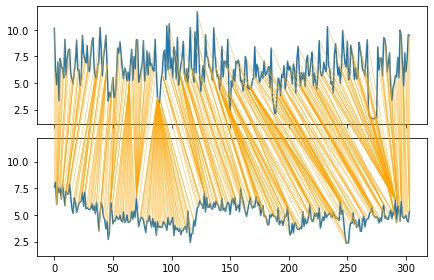

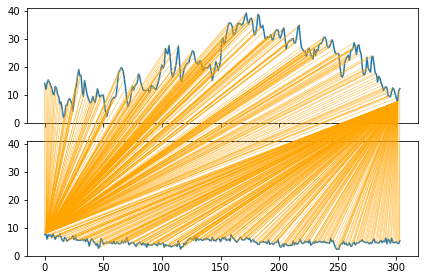

In [20]:
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

def distance_dtw(profil_1, profil_2, plot):
    s1 = df_day[profil_1].to_numpy()
    s2 = df_day[profil_2].to_numpy()
    if plot == True:
        path = dtw.warping_path(s1, s2)
        dtwvis.plot_warping(s1, s2, path )
    return(dtw.distance(s1,s2))


def distance_groupe(mat):
    ds = dtw.distance_matrix_fast(mat)
    return(ds)

print(distance_dtw("D0000", "D0001", True))
print(distance_dtw("temperature", "D0001", True))

In [21]:
from sklearn.linear_model import LinearRegression
modeleReg=LinearRegression()


def score_var(profil, variable):
    y = df_day[[profil]].values
    x = df_day[[variable]].values
    model = modeleReg.fit(x,y)
    return(model.score(x,y))

print(score_var("D0000", "temperature"))
print(score_var("D0000", "nebulosity"))
    

0.034111810065845294
0.03964674424231995


In [22]:
df_features["R2_temp"] = [score_var(profil, "temperature") for profil in liste_des_profils]
df_features["R2_nebulosity"] = [score_var(profil, "nebulosity") for profil in liste_des_profils]

df_features

,Moyenne,Minimum,Maximum,mois_conso_max,mois_conso_min,jour_conso_max,jour_conso_min,R2_temp,R2_nebulosity
D0000,0.132026,0.008,1.458,1,8,122,272,0.034112,3.964674e-02
D0001,0.103840,0.016,0.870,1,4,1,249,0.004162,7.447551e-03
D0002,0.388914,0.065,3.956,1,8,15,204,0.160464,8.333669e-02
D0003,0.192373,0.000,1.680,3,11,26,56,0.022288,4.976586e-03
D0004,0.107931,0.006,0.837,1,8,15,206,0.487744,1.350756e-01
...,...,...,...,...,...,...,...,...,...
D1020,0.176973,0.021,1.467,1,2,53,209,0.000271,1.746228e-08
D1021,0.088107,0.026,1.130,10,3,263,84,0.000289,2.866229e-03
D1022,0.121452,0.017,2.075,1,7,0,174,0.327101,7.481183e-02
D1023,0.048368,0.006,0.969,1,8,14,187,0.262309,3.004111e-02


In [94]:
from tqdm import tqdm

In [ ]:
## Attention code long à tourner ! (environ 1 heure), resultat importable directement avec features.csv
df_features['max_semaine_moyenne'] = [max(semaine_moyenne(df_temp, profil).values)[0] for profil in tqdm(liste_des_profils)]
df_features['min_semaine_moyenne'] = [min(semaine_moyenne(df_temp, profil).values)[0] for profil in tqdm(liste_des_profils)]
df_features['moment_max_semaine_moyenne'] = [list(semaine_moyenne(df_temp, profil).idxmax())[0] for profil in tqdm(liste_des_profils)]
df_features['moment_min_semaine_moyenne'] = [list(semaine_moyenne(df_temp, profil).idxmin())[0] for profil in tqdm(liste_des_profils)]

 11%|█         | 112/1007 [11:51<1:46:24,  7.13s/it]

Now that we have created our own features by hand, it is important to normalize them : indeed, most of the clustering algorithms are based on the Euclidean norm to create clusters, so all our features must have the same order of magnitude so that some of them don't take more space than others in the clustering. For example, as it is, the clustering would have made groups by "month_conso_min" or "day_conso_max" and would probably not have taken into account the average consumption of the individuals at all. 

In [23]:
scaler_features = StandardScaler()

df_features_scaled = scaler_features.fit_transform(df_features)

df_features_scaled = pd.DataFrame(df_features_scaled)

df_features_scaled.columns = df_features.columns

df_features_scaled.describe()

,Moyenne,Minimum,Maximum,mois_conso_max,mois_conso_min,jour_conso_max,jour_conso_min,R2_temp,R2_nebulosity
count,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03
mean,5.942505e-17,-2.408974e-17,2.997712e-16,3.856564e-16,-2.836747e-16,9.569748e-17,-6.777652e-17,4.851024e-17,1.622750e-17
std,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00
min,-1.374079e+00,-8.536723e-01,-1.948637e+00,-6.963851e-01,-2.482032e+00,-1.040108e+00,-2.127691e+00,-1.012242e+00,-1.005001e+00
25%,-6.629380e-01,-5.884409e-01,-6.861337e-01,-6.963851e-01,-7.840659e-01,-8.194699e-01,-7.038591e-01,-7.903510e-01,-7.888128e-01
50%,-2.249779e-01,-2.237478e-01,-1.817439e-01,-6.963851e-01,6.491728e-02,-3.581359e-01,1.133754e-02,-3.125187e-01,-3.248097e-01
75%,3.723651e-01,3.232919e-01,4.805862e-01,1.407734e-01,4.894089e-01,6.898946e-01,7.790256e-01,4.911150e-01,5.275776e-01
max,8.724206e+00,1.406559e+01,5.595813e+00,2.094143e+00,1.762884e+00,1.998679e+00,1.848540e+00,3.570841e+00,5.231822e+00


In [30]:
df_features = pd.read_csv('features.csv')
df_features = df_features.set_index("Unnamed: 0")
df_features

,Moyenne,Minimum,Maximum,mois_conso_max,mois_conso_min,jour_conso_max,jour_conso_min,max_semaine_moyenne,min_semaine_moyenne,moment_max_semaine_moyenne,moment_min_semaine_moyenne,R2_temp,R2_nebulosity
Unnamed: 0,,,,,,,,,,,,,
D0000,0.132026,0.008,1.458,1,8,122,272,0.308209,0.042744,185,204,0.034112,3.964674e-02
D0001,0.103840,0.016,0.870,1,4,1,249,0.187698,0.051605,41,248,0.004162,7.447551e-03
D0002,0.388914,0.065,3.956,1,8,15,204,0.912605,0.126581,325,242,0.160464,8.333669e-02
D0003,0.192373,0.000,1.680,3,11,26,56,0.858721,0.074372,250,335,0.022288,4.976586e-03
D0004,0.107931,0.006,0.837,1,8,15,206,0.284581,0.021930,301,7,0.487744,1.350756e-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1020,0.176973,0.021,1.467,1,2,53,209,0.380233,0.087767,232,8,0.000271,1.746228e-08
D1021,0.088107,0.026,1.130,10,3,263,84,0.167581,0.052907,187,55,0.000289,2.866229e-03
D1022,0.121452,0.017,2.075,1,7,0,174,0.339000,0.030744,274,158,0.327101,7.481183e-02


In [31]:
### Les données importées ne sont pas normalisées, nous devons refaire la manipulation

scaler_features = StandardScaler()

df_features_scaled = scaler_features.fit_transform(df_features)

df_features_scaled = pd.DataFrame(df_features_scaled)

df_features_scaled.columns = df_features.columns

df_features_scaled.describe()

,Moyenne,Minimum,Maximum,mois_conso_max,mois_conso_min,jour_conso_max,jour_conso_min,max_semaine_moyenne,min_semaine_moyenne,moment_max_semaine_moyenne,moment_min_semaine_moyenne,R2_temp,R2_nebulosity
count,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03,1.007000e+03
mean,6.813484e-17,-2.778314e-17,3.154268e-16,3.856564e-16,-2.836747e-16,9.569748e-17,-6.777652e-17,-4.520272e-18,3.880819e-17,4.851024e-17,2.623963e-17,5.468427e-17,1.661338e-17
std,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00,1.000497e+00
min,-1.374079e+00,-8.536723e-01,-1.948637e+00,-6.963851e-01,-2.482032e+00,-1.040108e+00,-2.127691e+00,-1.545912e+00,-1.028862e+00,-1.882684e+00,-1.588285e+00,-1.012242e+00,-1.005001e+00
25%,-6.629380e-01,-5.884409e-01,-6.861337e-01,-6.963851e-01,-7.840659e-01,-8.194699e-01,-7.038591e-01,-6.980624e-01,-5.259490e-01,-1.008295e+00,-9.895668e-01,-7.903510e-01,-7.888128e-01
50%,-2.249779e-01,-2.237478e-01,-1.817439e-01,-6.963851e-01,6.491728e-02,-3.581359e-01,1.133754e-02,-2.116319e-01,-2.444557e-01,3.311290e-02,-8.908090e-03,-3.125187e-01,-3.248097e-01
75%,3.723651e-01,3.232919e-01,4.805862e-01,1.407734e-01,4.894089e-01,6.898946e-01,7.790256e-01,4.471699e-01,1.802561e-01,8.583792e-01,9.511052e-01,4.911150e-01,5.275776e-01
max,8.724206e+00,1.406559e+01,5.595813e+00,2.094143e+00,1.762884e+00,1.998679e+00,1.848540e+00,6.633597e+00,1.202380e+01,1.408557e+00,1.869828e+00,3.570841e+00,5.231822e+00


### C- Using $non$ $negative$ $matrix$ $factorization$ to reduce dimension

We also try to use the factorization of positive matrices to reduce the dimension. Indeed, the initial data frame (obtained before any processing) presents only positive data, since it is the energy consumption data. 
Here, we will use a min_max scaler in order to keep positive values, and be able to use the $non$ $negative$ $matrix$ $factorization$. 

In [26]:
from sklearn.decomposition import NMF 
model = NMF(n_components = 100) # Nous ne gardons ici que 100 composantes car l'algorithme prend du temps à tourner.
model.fit(df) 
df_4 = model.transform(df) 

C:\Users\agros\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"
C:\Users\agros\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1076: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


In [33]:
df_nmf = pd.DataFrame(df_4)
df_nmf

min_max_scaler = preprocessing.MinMaxScaler()
df_nmf = pd.DataFrame(min_max_scaler.fit_transform(df_nmf))
df_nmf

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0.054748,0.000000,0.170028,0.051263,0.000000,0.000000,0.000000,0.000490,0.000694,0.000000,...,0.000883,0.008446,0.000000,0.003247,0.003059,0.012338,0.005428,0.003378,0.000000,0.000000
1,0.039899,0.000000,0.031587,0.080732,0.001459,0.000000,0.000000,0.000000,0.000000,0.010807,...,0.000759,0.001429,0.000000,0.002979,0.005598,0.000000,0.005271,0.002766,0.000000,0.013707
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.016730,0.002950,0.044072,0.005065,0.002634,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001937,0.043195,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.008726,0.002551,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000094,0.005324,0.000000,0.014021,0.000000,0.000000
4,0.000000,0.000000,0.171267,0.000000,0.115401,0.002978,0.000000,0.009005,0.007468,0.001488,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005071,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1002,0.103079,0.000000,0.183957,0.249523,0.002519,0.000000,0.000000,0.000000,0.008599,0.006102,...,0.010755,0.000000,0.006896,0.001015,0.018247,0.005684,0.000000,0.000000,0.000000,0.011474
1003,0.038423,0.001481,0.049885,0.068678,0.018784,0.000000,0.000604,0.000000,0.001902,0.003648,...,0.000000,0.000000,0.004635,0.000000,0.003405,0.003293,0.008353,0.004132,0.000000,0.000000
1004,0.015379,0.000000,0.000000,0.216468,0.000000,0.000000,0.000318,0.001533,0.004307,0.004606,...,0.000000,0.000154,0.021847,0.000000,0.000749,0.000000,0.013304,0.003665,0.016813,0.000000
1005,0.010032,0.000000,0.020707,0.086844,0.000000,0.000000,0.000000,0.002219,0.000000,0.004925,...,0.000000,0.000000,0.007421,0.001797,0.005061,0.000000,0.000000,0.000005,0.016751,0.009187


We can now perform clustering on the df_acp, df_features, df_features_2 and df_nmf dataframes, and try to see which dimension reduction method works best. 

# III- Clustering

## A) Hierarchical classification

We start by clustering by hierarchical classification. The advantage of such a technique is that we can decide here to cut the dendogram at the desired place, to obtain groups of the desired size. In order to evaluate our results, we use the **Calinski Harabasz** index. We have at our disposal a Benchmark returning a score of 3.9, so this is the score to exceed for our clustering.

In [31]:
benchmark = pd.read_csv('/Users/nicolasjulien/Documents/ENSAE/S2/Seminaire de modélisation stat/Data Set Semianire de model stat/benchmark.csv')

In [45]:
print("Indice de Calinski Harabasz Benchmark : ", calinski_harabasz_score( X = df, labels = benchmark['cluster']))

NameError: name 'calinski_harabasz_score' is not defined

In [47]:
from sklearn.metrics import calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

def CAH(df_reduced, k, dataframe, method_eval_scale=False):
    
    if method_eval_scale == True :
        df_compare = df_scaled
    else:
        df_compare = df # fixe si l'on calcule le score le df originel ou le df normalisé
        
    Z = linkage(df_reduced,method='ward',metric='euclidean')
    plt.title("Classification ascendante hiérarchique")
    dendrogram(Z,orientation='left', color_threshold=3)
    plt.show()
    groupes_cah = fcluster(Z, t = k, criterion= 'maxclust')
    df_cah_1 = pd.DataFrame(groupes_cah)
    df_cah_1["ID"] = df_cah_1.index
    print("Indice de Calinski Harabasz : ", calinski_harabasz_score( X = df_compare, labels = df_cah_1[0]))
    if dataframe == True : 
        return(df_cah_1.set_index("ID", drop = True))
    else : 
        return(df_cah_1.groupby([0]).count())

#print(CAH(df_acp, 6, dataframe = False),'ACP')
#print(CAH(df_nmf, 6, dataframe = False),'NMF')
#print(CAH(df_features, 6, dataframe = False),'Features')

 We obtain here some interesting results. First of all, for the PCA, the score seems very good, the hierarchical clustering on this data seems to work well. However, we get a cluster with only 2 individuals: we should try to cut earlier in order to have more consistent clusters (the instruction requires 50 per cluster). 
The data reduced by NMF obtain a good score, but the result of the hierarchical classification is not at all exploitable: we obtain clusters with too few individuals.
Finally, the data reduced by the "hand-made features" method return very consistent clusters, but the score seems much worse. This way of reducing the data spreads the individuals a lot but forgets a lot of their characteristics. 
Let's try to cut earlier for the PCA:


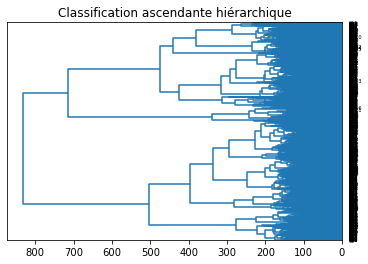

Indice de Calinski Harabasz :  36.47428711946851
    ID
0     
1  550
2   71
3  386 ACP 3


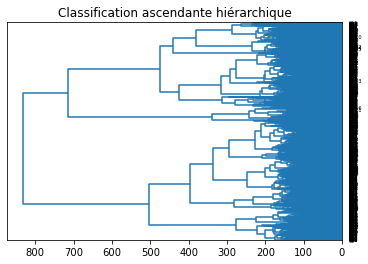

Indice de Calinski Harabasz :  28.284151922731205
    ID
0     
1  143
2  407
3   71
4  386 ACP 4


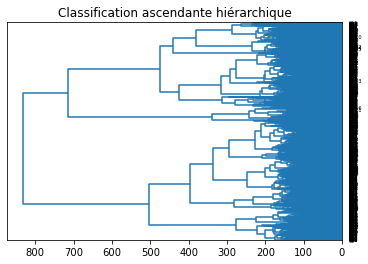

Indice de Calinski Harabasz :  21.911382302958025
    ID
0     
1  143
2  407
3   71
4  243
5  143 ACP 5


In [30]:
for k in [3,4,5]:
    print(CAH(df_acp, k, False),'ACP', k)

We notice that we obtain convincing results as soon as we only want 5 groups. Thus, hierarchical clustering on ADF data seems to work very well. However, we do not want to stop with these results alone: let's try to test other clustering methods, such as K-Means, which will perhaps allow us to exploit our other ways of reducing the data, and maybe even do better.

### B) K-MEANS

K-Means are the most popular clsutering algorithms, because they are very efficient and scalable. In particular, we can always specify the number of clusters we want to obtain: let's try to look at what is the optimal number of clmuster for each of our df derivatives.

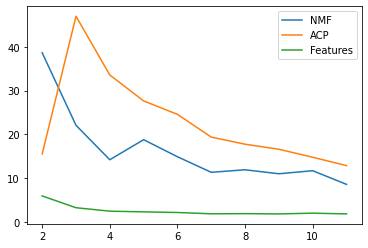

In [35]:
from sklearn.cluster import KMeans

def df_kmeans(data, k, print_groupe, method_eval_scale=False):
    
    if method_eval_scale == True :
        df_compare = df_scaled
    else:
        df_compare = df # fixe si l'on calcule le score le df originel ou le df normalisé
        
    cluster = KMeans(n_clusters = k, random_state = 42)
    cluster.fit(data)
    results = pd.DataFrame(cluster.predict(data))
    indice = calinski_harabasz_score(df_compare, cluster.predict(data))
    if print_groupe == True:
        return(results)
    else :
        return(indice)
L = []
M = []
N = []

for i in range(2, 12): 
    L.append(df_kmeans(df_nmf, i, print_groupe = False))
    M.append(df_kmeans(df_acp, i , print_groupe = False))
    N.append(df_kmeans(df_features, i , print_groupe = False))
    
plt.plot(range(2,12), L, label = "NMF")
plt.plot(range(2,12), M, label = "ACP")
plt.plot(range(2,12), N, label = "Features")
plt.legend()

We notice that once again, PCA seems to be the best way to reduce our data, as we get excellent scores (comparable to what ACH gave us). NMF seems to be better when we want to obtain a large number of clusters. Our features data_set seems however unusable to get good scores and good clusterings. We assume that we don't want to get more than 9 different clusters and will therefore retain the PCA. Let's see if our clusters are balanced:

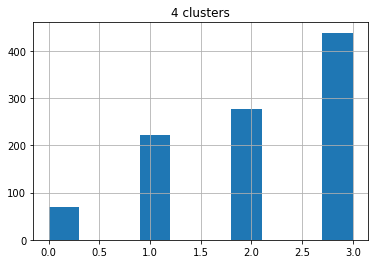

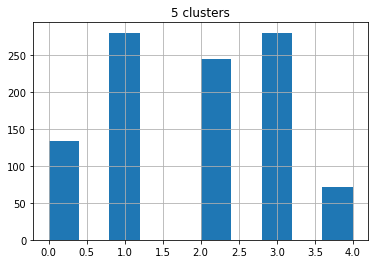

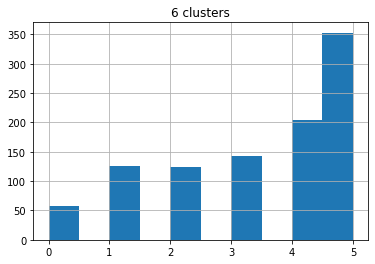

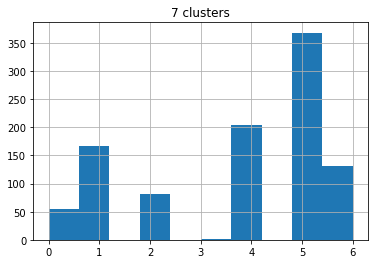

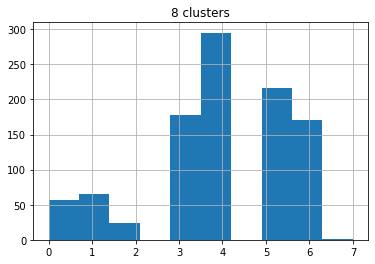

In [50]:
for k in [4,5,6,7,8]:
    df_kmeans(df_acp, k , True).hist()
    plt.title(label = '{} clusters'.format(k))


Our results seem rather balanced, even when we have 7 clusters. So the PCA + K_Means method seems to work perfectly. However, we underlined earlier that the K_Means are scalable: one of the reasons is that we can choose with which norm they work. Now we have previously introduced the distance dtw, which was very efficient to compare two time series. Well, the K_Means can work with this norm in order to cluster time series ! Let's try to see if it can outshine our PCA+K_Means

### With the DTW distance

In [51]:
#pip install tslearn

In [33]:
from sklearn.cluster import KMeans
from tslearn.metrics import dtw
from tslearn.clustering import TimeSeriesKMeans

C:\Users\agros\anaconda3\lib\site-packages\tslearn\clustering\kmeans.py:16: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  warnings.warn(


To perform a clustering algorithm on time series, we generally use the "DTW" metric, literally "dynamic time warping", which allows us to identify similar patterns within the time series. When we use the PCA dimension reduction, we do not have any more time series, so we cannot use this method. We will therefore test this clustering on monthly and weekly time series. 

In [56]:
df_scaled['Month']=time.str[5:7].transform(int, axis = 0)
df_month = df_scaled.groupby('Month').mean() # On recréée un df_month normalisé
df_scaled["Day"] = time.str[5:10]
df_day = df_scaled.groupby('Day').mean().drop(columns='Month') 
df_scaled = df_scaled.drop(columns=['Month','Day'])

In [ ]:
def kmeans_dtw(k, DataFrame, print_group, method_eval_scale = False): 
    
    if method_eval_scale == True :
        df_compare = df_scaled
    else:
        df_compare = df # fixe si l'on calcule le score le df originel ou le df normalisé
        
    model = TimeSeriesKMeans(n_clusters=k, metric="dtw",  max_iter = 20)
    model.fit(DataFrame.transpose())
    results_dtw = pd.DataFrame(model.predict(DataFrame.transpose()), columns = ['groupe'])
    results_dtw["ID"] = liste_des_profils
    print(results_dtw.groupby(['groupe']).count())
    if print_group == True:
        print("Indice de Calinski Harabasz : ", calinski_harabasz_score( X = df.transpose(), labels = results_dtw['groupe']))
        return(results_dtw.set_index("ID", drop = True))
    return("Indice de Calinski Harabasz : ", calinski_harabasz_score( X = df_compare, labels = results_dtw['groupe']))

kmeans_dtw(2, df_month[[profil for profil in liste_des_profils]], print_group = True).to_csv("profils_max_indices.csv")

For our first example, the algorithm seems to work very well. Indeed, we get a score of 47, which is a bit higher than our *ACP+K_Means*. This seems logical, since the dtw distance allows us to avoid going through a dimension reduction while being able to easily compare two time series. Let's try to see for which number of clusters our score would be maximal (and for which aggregation: per month or per day?)

  0%|          | 0/10 [00:00<?, ?it/s]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       173
1       834


 10%|█         | 1/10 [00:10<01:38, 10.95s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       367
1        85
2       555


 20%|██        | 2/10 [00:27<01:40, 12.60s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       336
1        74
2       529
3        68


 30%|███       | 3/10 [01:02<02:15, 19.39s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       328
1        75
2        77
3       411
4       116


 40%|████      | 4/10 [01:31<02:13, 22.23s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       143
1        20
2       324
3        34
4       419
5        67


 50%|█████     | 5/10 [01:55<01:54, 22.89s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0        46
1       368
2        14
3       201
4       208
5       105
6        65


 60%|██████    | 6/10 [02:30<01:46, 26.51s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       360
1        49
2        91
3        24
4        15
5       292
6       106
7        70


 70%|███████   | 7/10 [03:12<01:33, 31.08s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       379
1        55
2       246
3        65
4        14
5         6
6       168
7        34
8        40


 80%|████████  | 8/10 [03:48<01:04, 32.45s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       197
1        30
2        28
3       158
4       333
5        30
6        17
7        16
8       168
9        30


 90%|█████████ | 9/10 [04:42<00:39, 39.06s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0        78
1        28
2        51
3        51
4        38
5       137
6        25
7       173
8        14
9       303
10      109


100%|██████████| 10/10 [05:31<00:00, 33.19s/it]


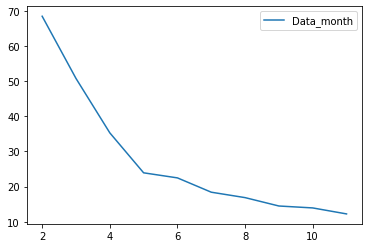

In [83]:
from tqdm import tqdm
L = []
M = []

for i in tqdm(range(2, 12)): 
    
    L.append(kmeans_dtw(i, df_month, print_group = False)[1])
    # M.append(kmeans_dtw(i, df_day, print_group = False)[1]) trop de temps
    
plt.plot(range(2,12), L, label = "Data_month")
# plt.plot(range(2,12), M, label = "Data_day") prend trop de temps
plt.legend()


We observe a clear decrease of the score with the number of clusters we set. Thus, from a score maximization point of view, it is in our interest to reduce the number of clusters as much as possible in order to obtain the highest possible score. However, in the reality of the business world, the objective is not always to maximize the score. Having to reduce the number of clusters to 2 is a bit of a stretch, as the objective of clustering is to create clearly differentiated groups, and in the business world, one will rarely be satisfied with just two profile-types. Thus, we thought it wise not to try to maximize the score at all costs, but rather to try to make a compromise: to have a sufficient number of clusters to have interesting and exploitable results, while trying to keep a maximum score. A bit like a penalty for prediction, we could recreate our own criteria that would increase with the number of clusters proposed. The more clusters we have, the more we can differentiate different groups of individuals, so it seems logical that even if 2 seems to be the optimal number of clusters, it seems better to choose 7 or 8 in order to obtain really differentiated groups. 
Moreover, we already make the bias of sacrificing score for better "concrete" results: this was the whole approach of normalizing data by individuals.
So we extract our results for 8 clusters


In [58]:
clustering_dtw_month = kmeans_dtw(8, df_month, print_group = True)

C:\Users\agros\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       110
1        78
2        97
3       327
4       301
5        37
6        14
7        43
Indice de Calinski Harabasz :  17.396443890251646


However, we also notice another problem: the clusters returned by the dtw_KMeans are sometimes a bit unevenly distributed: from more than 6 clusters, we get clusters of less than 50 individuals...We wanted to find a method that would allow us to get clusters of more than 50 individuals for sure, while not reducing the score too much. This brings us to our last clustering method...

Implementing the kmeans algorithm with the DTW distance is very time consuming on the entire day-scale indexed time series. However, when we ran the algorithm on the unnormalized dataframe, we got a better score when working on the monthly time series (CH Index of 184). Therefore, it was decided to continue the analysis on the clustering performed at the monthly level. 

La cellule ci-dessous montre une implémentation de l'algorithme sur le dataframe contenant l'ensemble des séries journalières non renormalisées. 

In [105]:
#clustering_dtw_day = kmeans_dtw(3, df_day, print_group = True)
#Ne pas réexécuter cette ligne, résultat stocké sous forme de csv
#classification_dtw_day.to_csv("classification_dtw.csv")
# CH : 173.6864933968253 < même algorithme implémenté sur df_month (184)


C:\Users\agros\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       643
1       330
2        34
Indice de Calinski Harabasz :  173.6864933968253


On remarque que l'indice de Calinski-Harabasz est maximal lorsque l'on considère data_month. On gardera donc les résultats du clustering effectués sur data_month.

##  *Reclustering* de l'algorithme des kmeans à l'aide d'un *Random Forest Classifier*

We would like to be able to obtain clusters that contain at least 50 individuals, regardless of the number of clusters specified in the K_Means. We will then proceed to a reclustering of the individuals belonging to clusters of less than 50 persons. Instead of making a "garbage" cluster, we will distribute these individuals in the different existing clusters in a more thoughtful way. The principle is to use a classification model, trained on the already well established clusters of more than 50, to predict a new family for the individuals who belonged to small clusters.

In [59]:
from sklearn.ensemble import RandomForestClassifier

def reclustering(dataframe, minpargroupe = 50, model = RandomForestClassifier(max_depth=10)):
    
    effectifs = dataframe.groupby(["groupe"]).count()
    groupes_train = effectifs[effectifs[0]>=minpargroupe].index
    groupes_predict = effectifs[effectifs[0]<minpargroupe].index
    # identification des clusters qui contiennent plus de 50 individus, 
    
    data_train = dataframe[dataframe['groupe'].isin(groupes_train)]
    data_test = dataframe[dataframe['groupe'].isin(groupes_predict)]
    X = data_train.drop(columns='groupe')
    Y = data_train['groupe']
    X_pred = data_test.drop(columns='groupe')
    rf = model
    rf.fit(X, Y)
    Y_pred = rf.predict(X_pred)
    data_test['groupe']=Y_pred
    return(pd.concat([data_train,data_test]))
    
    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001DC925A09D0>]],
      dtype=object)

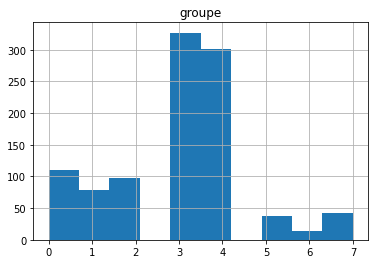

In [60]:
clustering_dtw_month.hist()

In [61]:
df_scaled = df_scaled.transpose()
df_scaled['groupe'] = np.array(clustering_dtw_month['groupe'])
df_reclustered = reclustering(df_scaled)

<ipython-input-59-a372f5c7ea6c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['groupe']=Y_pred


In [62]:
df_reclustered = reclustering(df_scaled)

<ipython-input-59-a372f5c7ea6c>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['groupe']=Y_pred


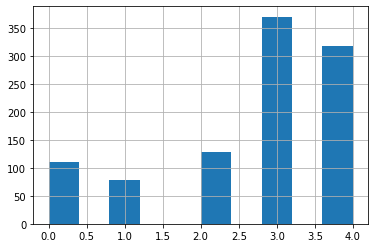

In [63]:
df_reclustered['groupe'].hist()

In [66]:
print("Indice de Calinski Harabasz : ", calinski_harabasz_score(X = df, labels = df_reclustered['groupe']))       

Indice de Calinski Harabasz :  0.8268595058930335


  0%|          | 0/10 [00:00<?, ?it/s]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       834
1       173


 10%|█         | 1/10 [00:18<02:46, 18.52s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       180
1       685
2       142


 20%|██        | 2/10 [00:34<02:22, 17.86s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0        84
1       577
2        67
3       279


 30%|███       | 3/10 [00:56<02:12, 18.92s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       376
1        67
2        57
3        70
4       437


 40%|████      | 4/10 [01:14<01:53, 18.85s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0        46
1       310
2        59
3       194
4        61
5       337


 50%|█████     | 5/10 [01:38<01:41, 20.23s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       450
1       160
2        64
3        14
4       106
5        90
6       123


 60%|██████    | 6/10 [02:11<01:36, 24.25s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0        78
1       162
2        89
3       383
4        18
5         2
6        28
7       247


 70%|███████   | 7/10 [02:36<01:13, 24.45s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0         2
1       183
2        44
3       184
4        72
5       401
6        89
7        14
8        18


 80%|████████  | 8/10 [03:22<01:01, 30.86s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0        67
1       261
2        87
3        15
4        38
5       136
6        15
7       319
8        32
9        37


 90%|█████████ | 9/10 [04:05<00:34, 34.31s/it]/Library/anaconda3/lib/python3.8/site-packages/tslearn/utils/utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0        87
1       168
2        53
3        88
4       201
5        50
6        14
7       253
8        72
9        19
10        2


100%|██████████| 10/10 [04:47<00:00, 28.70s/it]


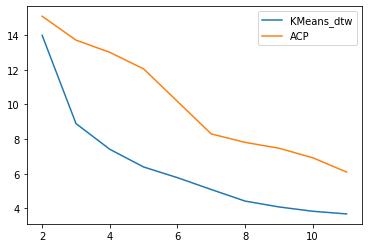

In [149]:
L = []
M = []

for i in tqdm(range(2, 12)): 
    
    L.append(kmeans_dtw(i, df_month, print_group = False,method_eval_scale = True )[1])
    M.append(df_kmeans(df_acp, i , print_groupe = False, method_eval_scale = True))
    

    
plt.plot(range(2,12), L, label = "KMeans_dtw")
plt.plot(range(2,12), M, label = "ACP")


plt.legend()

Attention, ce résultat est à considérer avec attention, car il aurait fallu relancer l'algorithme un nombre important de fois, puis faire la moyenne pour se départir de l'aléa.

In [93]:
clustering_final_acp = df_kmeans(df_acp, 6 , print_groupe = True, method_eval_scale = True)
clustering_final_dtw = kmeans_dtw(6, df_month, print_group = True,method_eval_scale = True)

C:\Users\agros\anaconda3\lib\site-packages\tslearn\utils\utils.py:88: UserWarning: 2-Dimensional data passed. Assuming these are 1007 1-dimensional timeseries
  warnings.warn('2-Dimensional data passed. Assuming these are '


         ID
groupe     
0       397
1       123
2        94
3        27
4        48
5       318
Indice de Calinski Harabasz :  5.744727350003564


In [96]:
df_clustered_acp = df.copy()
df_clustered_dtw = df.copy()

In [97]:
df_clustered_acp['groupe']= np.array(clustering_final_acp[0])
df_clustered_dtw['groupe']= np.array(clustering_final_dtw['groupe']) 

In [98]:
display(df_clustered_acp, df_clustered_dtw)

,0,1,2,3,4,5,6,7,8,9,...,14583,14584,14585,14586,14587,14588,14589,14590,14591,groupe
D0000,1.043,0.404,0.185,0.151,0.139,0.105,0.122,0.091,0.110,0.100,...,0.230,0.470,0.342,0.284,0.378,0.226,0.210,0.219,0.176,5
D0001,0.181,0.248,0.206,0.171,0.068,0.083,0.083,0.072,0.060,0.061,...,0.154,0.168,0.093,0.126,0.091,0.090,0.070,0.117,0.206,3
D0002,0.224,0.227,0.231,0.236,0.239,0.251,0.246,0.334,0.287,0.292,...,0.210,0.222,0.220,0.220,0.216,0.226,0.236,0.222,0.455,4
D0003,0.077,0.078,0.076,0.077,0.077,0.077,0.077,0.076,0.079,0.077,...,0.093,0.092,0.093,0.093,0.093,0.094,0.094,0.090,0.055,2
D0004,0.195,0.202,0.188,0.039,0.024,0.102,0.033,0.024,0.033,0.028,...,0.372,0.336,0.256,0.211,0.199,0.199,0.188,0.144,0.039,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1020,0.305,0.838,0.446,0.410,0.282,0.239,0.275,0.195,0.106,0.140,...,0.122,0.151,0.135,0.991,0.597,0.299,0.229,0.292,0.241,1
D1021,0.074,0.081,0.039,0.059,0.049,0.034,0.058,0.055,0.040,0.057,...,0.264,0.232,0.268,0.257,0.227,0.252,0.235,0.199,0.225,2
D1022,0.177,0.166,0.145,0.133,0.049,0.039,0.019,0.042,0.022,0.036,...,0.179,0.171,0.177,0.182,0.175,0.175,0.168,0.178,0.176,1
D1023,0.066,0.110,0.100,0.234,0.056,0.106,0.073,0.054,0.032,0.007,...,0.031,0.030,0.044,0.044,0.045,0.036,0.058,0.066,0.134,1


,0,1,2,3,4,5,6,7,8,9,...,14583,14584,14585,14586,14587,14588,14589,14590,14591,groupe
D0000,1.043,0.404,0.185,0.151,0.139,0.105,0.122,0.091,0.110,0.100,...,0.230,0.470,0.342,0.284,0.378,0.226,0.210,0.219,0.176,0
D0001,0.181,0.248,0.206,0.171,0.068,0.083,0.083,0.072,0.060,0.061,...,0.154,0.168,0.093,0.126,0.091,0.090,0.070,0.117,0.206,1
D0002,0.224,0.227,0.231,0.236,0.239,0.251,0.246,0.334,0.287,0.292,...,0.210,0.222,0.220,0.220,0.216,0.226,0.236,0.222,0.455,5
D0003,0.077,0.078,0.076,0.077,0.077,0.077,0.077,0.076,0.079,0.077,...,0.093,0.092,0.093,0.093,0.093,0.094,0.094,0.090,0.055,0
D0004,0.195,0.202,0.188,0.039,0.024,0.102,0.033,0.024,0.033,0.028,...,0.372,0.336,0.256,0.211,0.199,0.199,0.188,0.144,0.039,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
D1020,0.305,0.838,0.446,0.410,0.282,0.239,0.275,0.195,0.106,0.140,...,0.122,0.151,0.135,0.991,0.597,0.299,0.229,0.292,0.241,0
D1021,0.074,0.081,0.039,0.059,0.049,0.034,0.058,0.055,0.040,0.057,...,0.264,0.232,0.268,0.257,0.227,0.252,0.235,0.199,0.225,5
D1022,0.177,0.166,0.145,0.133,0.049,0.039,0.019,0.042,0.022,0.036,...,0.179,0.171,0.177,0.182,0.175,0.175,0.168,0.178,0.176,5
D1023,0.066,0.110,0.100,0.234,0.056,0.106,0.073,0.054,0.032,0.007,...,0.031,0.030,0.044,0.044,0.045,0.036,0.058,0.066,0.134,5


# IV - Characterization of the final clustering

In [102]:
from dtaidistance import dtw

def analyse_clustering(dataframe):
    
    data_represent = dataframe.groupby('groupe').median()
    liste_represent = data_represent.index
    data_represent = data_represent.transpose()
    data_represent["GMT"] = time
    
    graph_consos(data_represent, time = 'Week', liste_profils = liste_represent)

    semaine_moyenne_liste(data_represent, liste_represent, plot = True)
        
    journee_moyenne_liste(data_represent, liste_represent , plot = True)     

In [116]:
from sklearn.linear_model import LinearRegression
modeleReg=LinearRegression()
y = df_temp[["temperature"]].values


def analyse_thermosensibilite(dataframe):
    
    data_represent = dataframe.groupby('groupe').median()
    liste_represent = data_represent.index
    data_represent = data_represent.transpose()
    L = []
    for liste in liste_represent : 
        x = data_represent[[liste]].values
        model = modeleReg.fit(x,y)
        L.append(model.score(x,y))
    return(pd.DataFrame( L, liste_represent))

## A- Analyse $df$ $clustered$ $dtw$

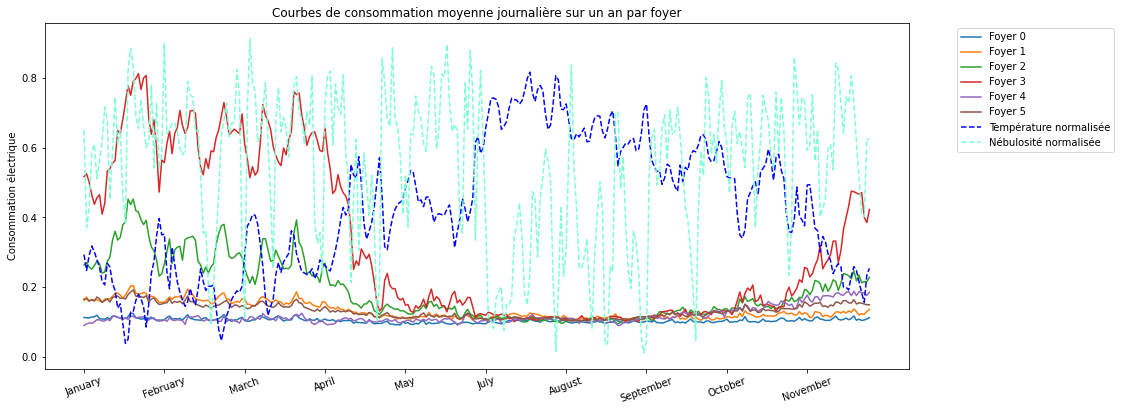

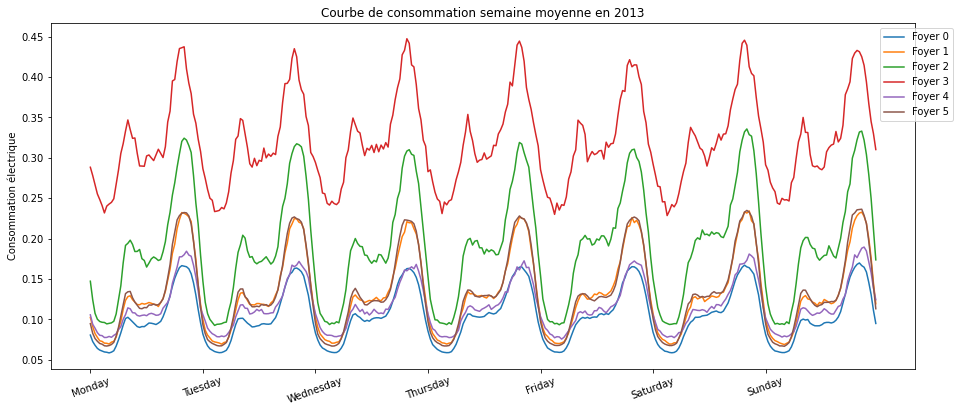

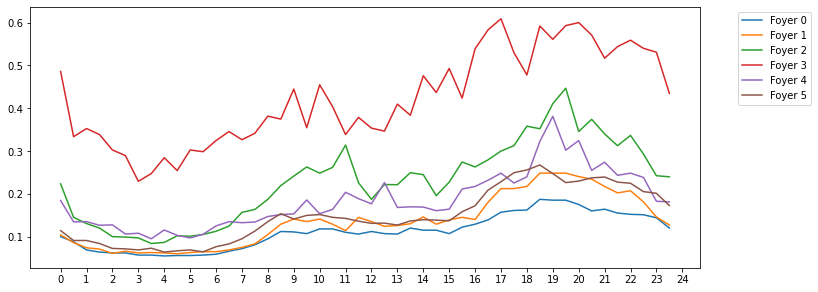

In [103]:
analyse_clustering(df_clustered_dtw)

We note that groups 0, 2 and 4 seem very similar: their consumption is low throughout the year, is constant regardless of the day of the week, and peaks between 7 and 8 pm. Group 3, which includes the highest consumers, is characterized by an explosion of consumption in winter, with a peak on Saturday evening. 
Group 5 and group 1 are similar, but they differ in their consumption at the beginning of the year, which is much lower for group 5. 

In [117]:
analyse_thermosensibilite(df_clustered_dtw)

,0
groupe,
0,0.003021
1,0.034993
2,0.258525
3,0.536031
4,0.000418
5,0.023801


We notice that groups 2 and 3 are the most temperature sensitive. This analysis allows us to distinguish group 2 from groups 0 and 4, which are not very sensitive to temperature. 
In terms of temperature sensitivity, groups 1 and 5 are similar. 
    

## B- Analyse $df$ $clustered$ $acp$

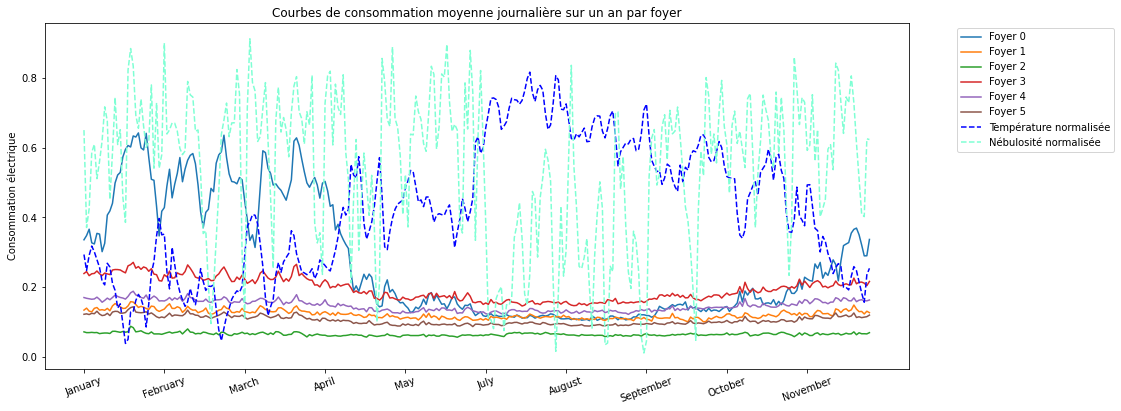

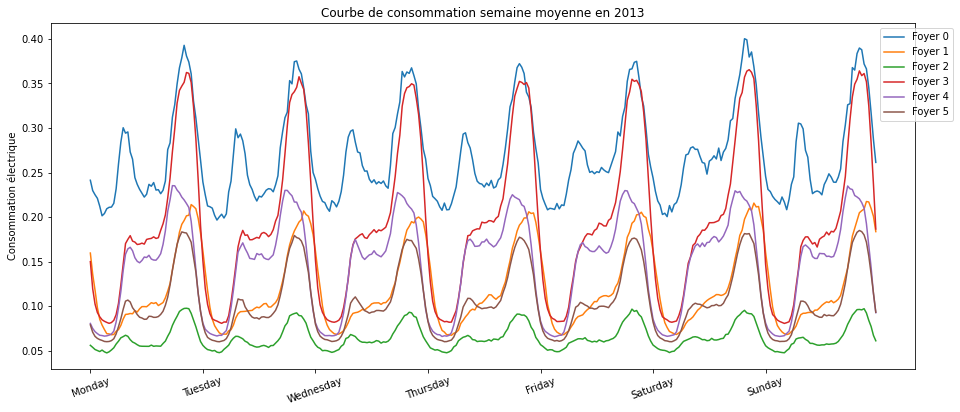

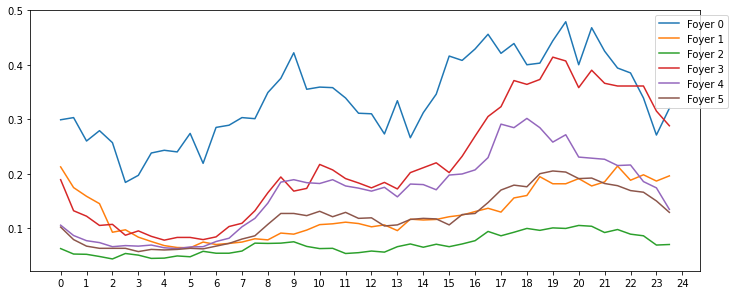

In [104]:
analyse_clustering(df_clustered_acp)

When using PCA, the profiles of the yearly curves are less distinct, and we observe mostly groups in terms of level. This clustering thus seems to take less into account the seasonal variations at the scale of the year. 
If we consider the profiles over the average week, we observe that the groups are all very different: group 0 is the one that consumes the most, but presents a more constant consumption on a daily scale, whereas group 3 presents a significant peak at the end of the day. 
Group 4 has an almost constant consumption throughout the day, while group 2 has two peaks: one in the morning and one in the evening. 

In [118]:
analyse_thermosensibilite(df_clustered_acp)

,0
groupe,
0,0.531546
1,0.008077
2,0.000011
3,0.020798
4,0.001097
5,0.013865


# Conclusion

We think that the main conclusion of this project is the following: in a $clustering$ problem, the pre-processing and the definition of the problem and the targeted result are the two most important facets of it. Indeed, in the end, the choice of the clustering algorithm itself was not very important, it is mainly the pre-processing work on our data (or the adaptation of the algorithm) that allowed us to obtain interesting and exploitable results. Since linear time series are relatively complex data to handle, one must always apply transformations (such as normalizations) in an applied and thoughtful way in order to keep good results. It is also important to define what we are looking for: generally, maximizing the score is only a "pretext", because the most important thing is that the results open up marketing and strategic analyses. Thus, it is essential to target from the beginning if we want to identify "raw" differences in consumption levels between households, or if we want to distinguish "annual" profiles (to know if they go on vacation, if they heat with electricity), or on the contrary "daily" profiles (to know at what time the households consume, if they consume during the day) 